# Домашняя работа по уроку 4.2
### Выполнил Мартысюк Илья. группа PY-3

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

PATH = '/Users/martysyuk/Documents/Python 3 Coding/Repositorys/PY-3-Learning/homeworks/names/'
START_YEAR = 1900
END_YEAR = 2000
NAMES = ['Ruth', 'Robert']
MERGE_ON = ['Name', 'Gender']
COLUMNS = ['Name', 'Gender', 'Count']

In [144]:
def open_files(_names):
    _data = dict()
    for _year in range(START_YEAR, END_YEAR+1):
        try:
            _file_name = PATH + 'yob' + str(_year) + '.txt'
            _year_data = pd.read_csv(_file_name, names=COLUMNS)
            for _name in _names:
                try:
                    _data[_name].update({_year: _year_data[_year_data.Name == _name].Count.sum()})
                except KeyError:
                    _data.update({_name: {_year: _year_data[_year_data.Name == _name].Count.sum()}})
        except FileNotFoundError:
            pass
    return _data

In [147]:
def get_lists_by_name(_data, _name):
    _years_list = list()
    _data_list = list()
    for _year in range(START_YEAR, END_YEAR+1):
        _years_list.append(_year)
        _data_list.append(_data[_name][_year])
    return _years_list, _data_list

In [168]:
def print_fig1(_data):
    plt.xlabel('Года')
    plt.ylabel('Рождено детей')
    plt.grid(True)
    for name in NAMES:
        axis_x, axis_y = get_lists_by_name(_data, name)
        plt.plot(axis_x, axis_y)
    plt.legend(NAMES)

Задание 1: Построить график изменения количества имен Ruth и Robert с 1900 по 2000


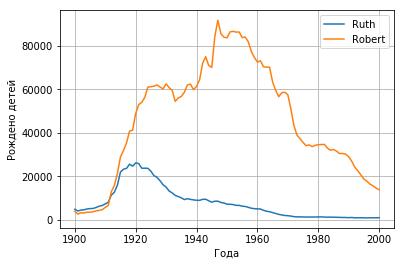

In [169]:
data = open_files(NAMES)

print('Задание 1: Построить график изменения количества имен Ruth и Robert с 1900 по 2000')
print_fig1(data)